# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/DSBA class_7_2022_to_2_2023/Project 1_DSBA/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

*   The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer





### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
#Finding number of rows and columns in the dataset
df.shape

(1898, 9)

Observations:

*   The dataset has 1,898 rows and 9 columns




### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
#Summary information on the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

* All the columns have 1,898 observations which indicates that there are no missing values
* The cost_of_the_order column is made up of the numeric datatype float64
* The order_id, customer_id, food_preparation_time, and the delivery_time columns make up the numeric datatype int64
* The columns restaurant_name, cuisine_type, day_of_the_week, and rating make upthe categorical datatype object
* Customer ID and Order Id are variables that are categorical but they have numerical entries



### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
#Checking for missing values
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

Observations:

*   There are zero missing values in the data
*   All 9 columns are made up of 1,898 non-null values




### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
#checking the statistical summary of the data
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Observations:

*  The minimum amount of time it takes for food to be prepared oncec the order is placed is 20 minutes   
*  The maximum amount of time it takes for food to be prepared once the order is placed is 35 minutes
*  The average amount of time or the mean for food to be prepared once the order is placed is just above 27 minutes or 27.37197




### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
#Finding the number of orders that have a rating of 'Not given'
df['rating'].value_counts()['Not given']

736

#### Observations:

*   Although there are no non-null values, there are 736 entries of "not given" in the rating column





### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

### Order ID


In [ ]:
#Finding unique values of order_id 
df['order_id'].nunique()

1898

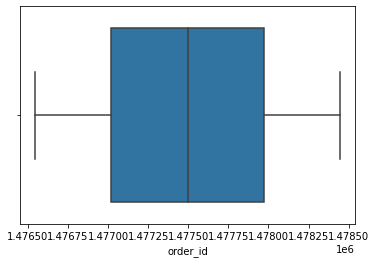

In [ ]:
sns.boxplot(data=df,x='order_id')
plt.show()

Observations:

*   The variable order_id  shows a normal distribution with 50% of the values falling above and below the order_id 1477501
*  The variable does not have any outliers
*   With order_id being a unique identifier, it is best to drop the variable from the dataset




### Customer ID

In [ ]:
#Unique values for customer_id
df['customer_id'].nunique()

1200

In [ ]:
#Top 5 most frequent customer_id's
df['customer_id'].value_counts().head()

52832     13
47440     10
83287      9
250494     8
259341     7
Name: customer_id, dtype: int64

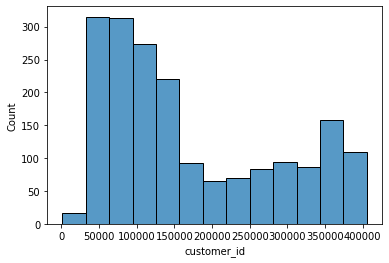

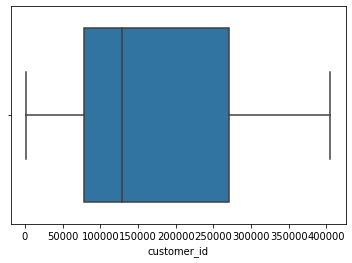

In [ ]:
sns.histplot(data=df, x='customer_id')
plt.show()
sns.boxplot(data=df, x='customer_id')
plt.show()


### Observations:

* The distribution of customer_id is slightly right skewed 
* There are no outliers in this variable
* There are 1200 unique values 
* Customer_id 52832 had the most number of orders at 13
* Customer_id 47440 had the second most number of orders at 10



###Restaurant name

In [ ]:
#Finding unique values for restaurant_name
df['restaurant_name'].nunique()

178

In [ ]:
#Most popular restaurants
df['restaurant_name'].value_counts().head()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

In [ ]:
#Percentage of most popular restaurants
df['restaurant_name'].value_counts(normalize='True')

Shake Shack                  0.115385
The Meatball Shop            0.069547
Blue Ribbon Sushi            0.062698
Blue Ribbon Fried Chicken    0.050580
Parm                         0.035827
                               ...   
Sushi Choshi                 0.000527
Dos Caminos Soho             0.000527
La Follia                    0.000527
Philippe Chow                0.000527
'wichcraft                   0.000527
Name: restaurant_name, Length: 178, dtype: float64

### Observations:

*   With there being 178 unique values, the value_counts method was used to analyze the variable restaurant_name
*  The top 5 restaurant restaurants for number of orders placed were Shake Shack with 219 orders, The Meatball Shop with 132 orders, Blue Ribbon Sushi with 119 orders, Blue Ribbon Fried Chicken with 96 orders and Parm with 68 orders
*  Shake Shack had the most orders placed and made up approximately 11.5% of all orders 



### Cuisine Type

In [ ]:
#Finding unique values of cuisine type
df['cuisine_type'].nunique()

14

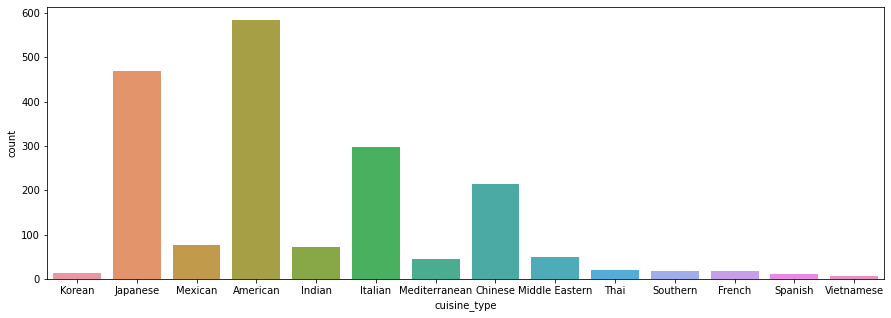

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='cuisine_type')

In [ ]:
#statistical summary of cuisine type
df['cuisine_type'].describe()

count         1898
unique          14
top       American
freq           584
Name: cuisine_type, dtype: object

In [ ]:
#Top cuisine types
df['cuisine_type'].value_counts().head()

American    584
Japanese    470
Italian     298
Chinese     215
Mexican      77
Name: cuisine_type, dtype: int64

### Observations:

*  There are 14 unique values of the variable cuisine_type
*  The top 5 cuisine_types are American, Japanese, Italian, Chinese and Mexican
*  The American cuisine type is the most popular with 584 orders
*  Chinese and Mexican are also in the top 5 most popular cuisine types, but they are not in the top 5 in regards to most popular restaurant names





### Cost of the order

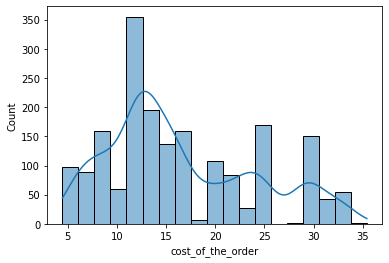

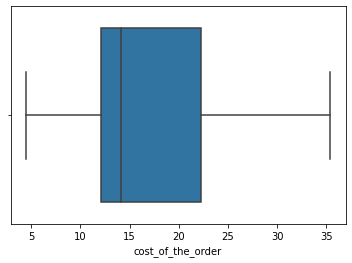

In [ ]:
sns.histplot(data=df, x='cost_of_the_order', kde='True')
plt.show()
sns.boxplot(data=df, x='cost_of_the_order')
plt.show()

In [ ]:
#statistical summary of order cost
df['cost_of_the_order'].describe()

count    1898.000000
mean       16.498851
std         7.483812
min         4.470000
25%        12.080000
50%        14.140000
75%        22.297500
max        35.410000
Name: cost_of_the_order, dtype: float64

### Observations:
* The distribution of the variable, cost_of_the_order, is slightly right skewed
* There may be a correlation between customer_id and cost_of_the_order as both are right skewed.  This could be due to the same customers ordering from the same restaurant more than once
* 50% of the orders cost above and below 14.14 with a mean cost of 16.49
* The most expensive order was 35.41 and the least expensive order was 4.47





### Day of the week

In [ ]:
#Finding unique values for days of the week
df['day_of_the_week'].nunique()

2

In [ ]:
#Finding most popular time during the week for orders
df['day_of_the_week'].value_counts()

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

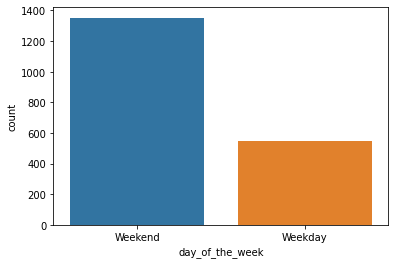

In [ ]:
sns.countplot(data=df, x='day_of_the_week')
plt.show()

### Observations:

*  The variable, day_of_the_week, has just two unique identifiers: weekend and weekday
*   The company receives over 70% of orders during the weekend, making it the busiest time for the business





### Rating

In [ ]:
#Unique values for rating
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [ ]:
#Top values for rating 
df['rating'].value_counts().head()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

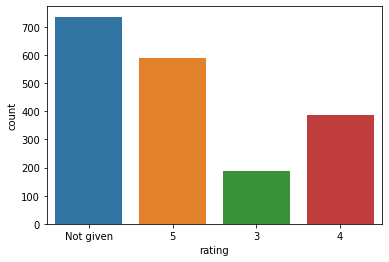

In [ ]:
sns.countplot(data=df, x='rating')

### Observations:

*   The variable, rating, consists of 4 unique values that are read as datatype object
*   The majority of the rating data is categorized as 'Not given' meaning the majority of customers did not provide a rating




### Food preparation time

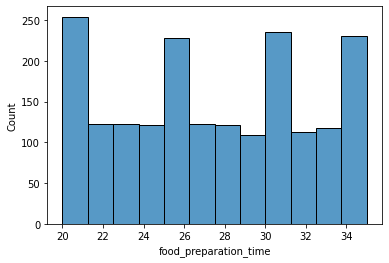

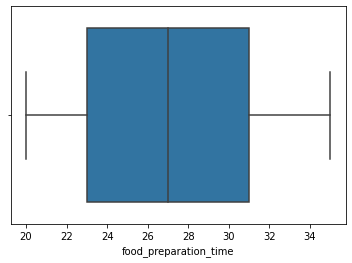

In [ ]:
sns.histplot(data=df, x='food_preparation_time')
plt.show()
sns.boxplot(data=df, x='food_preparation_time')
plt.show()

In [ ]:
#Food preparation time statistical summary
df['food_preparation_time'].describe()

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

###Observations:

*   The median for the variable food_preparation_time is 27 minutes, meaning that 50% of orders fall above and below 27 minutes
*   The average or mean for the variable is 27.37 minutes, so food_preparation_time is close to showing a normal distribution
*  The maxmimum time it took to prepare a food order was 35 minutes
*  The minimum time it took to prepare a food order was 20 minutes



### Delivery time

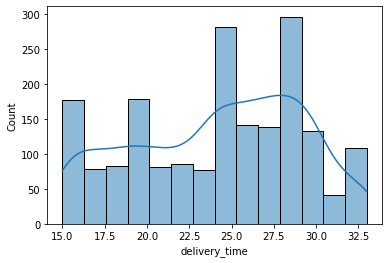

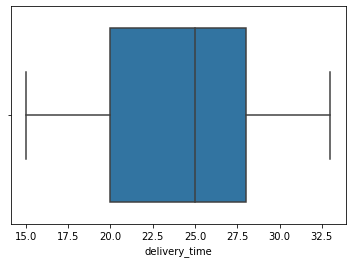

In [ ]:
sns.histplot(data=df, x='delivery_time', kde='True')
plt.show()
sns.boxplot(data=df, x='delivery_time')
plt.show()

In [ ]:
#Statistical summary of delivery time
df['delivery_time'].describe()

count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64

###Observations

*   50% of the delivery times fall above and below 25 minutes, which is the median 
*   The majority of orders take beteween 25 and 28 minutes to deliver
*   The longest delivery time took 33 minutes while the shortest delivery time took 15 minutes
*   The average delivery time was 24.16 minutes
*   The distribution in delivery time is slightly left skewed
*  Both delivery time and food preparation time have a high standard deviation, meaning the data is more spread out from the mean.  This makes sense as there are 178 different restaurants that the business delivers to




### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
#Finding the top value counts of restaurant name
df['restaurant_name'].value_counts().head()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:

*   2 American, 2 italian, and a Japanese restaurant makeup the top 5 restaurants with number of orders received.
*   This makes sense as American, Japanese, and Italian made up the top 3 in cuisine type
*  Shake Shack had the highest number of orders received at 219




### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
#Finding most popular cuisine on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observations:

*   The most popular cuisine on weekends is American with 415 orders placed
*   American is the most popular cuisine and American restaurants are the most popular place to order from as well
*   Again, the top 3 cuisines American, Japanese and Italian are also the most popular overall







### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
#The number of orders greater than 20 dollars
df_greater_than_20 = df[df['cost_of_the_order']>20]
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

#Percentage of orders greater than 20 dollars
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100
print('Percentage of orders above 20 dollars:', round(percentage, 2), '%')

#Finding the restaurants with the most number of orders over 20 dollars 
df_greater_than_20['restaurant_name'].value_counts().head()

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


Shake Shack                  65
The Meatball Shop            37
Blue Ribbon Fried Chicken    34
Blue Ribbon Sushi            28
Parm                         20
Name: restaurant_name, dtype: int64

#### Observations:

*   The percentage of orders costing more than 20 dollars was 29.24% with a total of 555 orders
*   Shake Shack was again the restaurant with the highest number of orders that cost over 20 dollars with 65 orders 




### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
df['delivery_time'].mean()

24.161749209694417

#### Observations:

*   The average time it takes to have the orders delivered is 24.16 minutes




### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
df['customer_id'].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:

*   The top 3 most frequent customers were customer_ID's 52832, 47440, and 83287
*   Customer_id 52832 had a total of 13 orders, while customer_ID's 47440 and 83287 had 10 and 9 orders




### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


###Cuisine vs Cost of the order

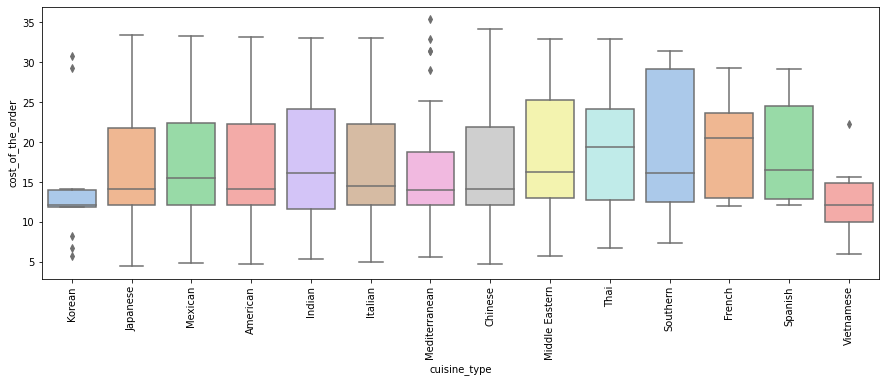

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x='cuisine_type', y='cost_of_the_order',data=df, palette = 'pastel')
plt.xticks(rotation=90)
plt.show()

###Observations:

*   Korean, Mediterranean, and Vietnamese all had outliers
*   Korean cuisine had outliers where the cost was a lot more expensive and a lot less expensive than the average cost of its orders.  This could be due to customers ordering one item such as an appetizer or due to a customer making an order for several people
*   Mediterranean had several outliers that were all unusualy higher than the average cost of Mediterranean orders.  This could also be due to a customer making an order for more than one person
*   Vietnamese had one outlier that was unsually higher than the average cost of its orders
*  The majority of the cuisine types are right skewed, while Thai and French cuisines were left skewed





###Food Preparation time vs Cuisine

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


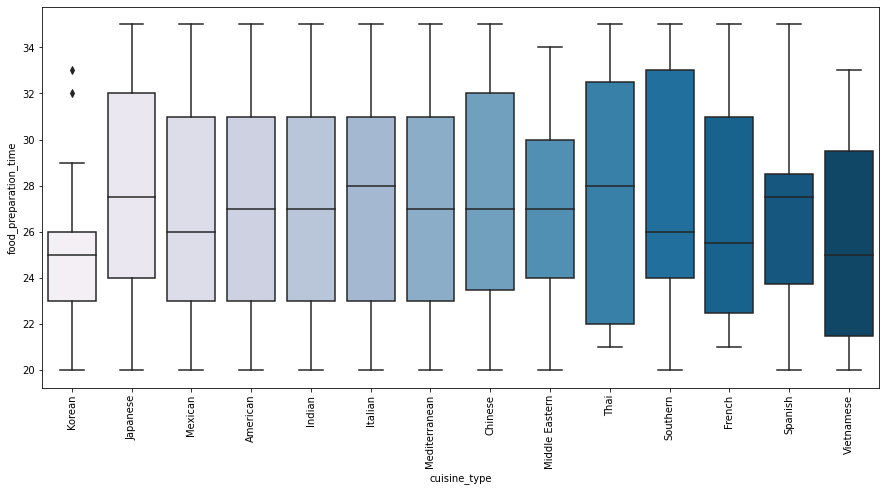

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot('cuisine_type',y='food_preparation_time',data=df, palette='PuBu')
plt.xticks(rotation=90)
plt.show()

###Observations:

*   Korean cuisine was the only cuisine type with outliers which could be due to having to prepare for large orders
*   The outliers for Korean cuisine makes sense as they had outliers when compared to cost of the order.
*  The majority of the cuisine types take between 24 and 31 minutes to prepare
*  Thai cuisine seemed to have the most variance in food preparation time



###Cuisine type and Day of the week

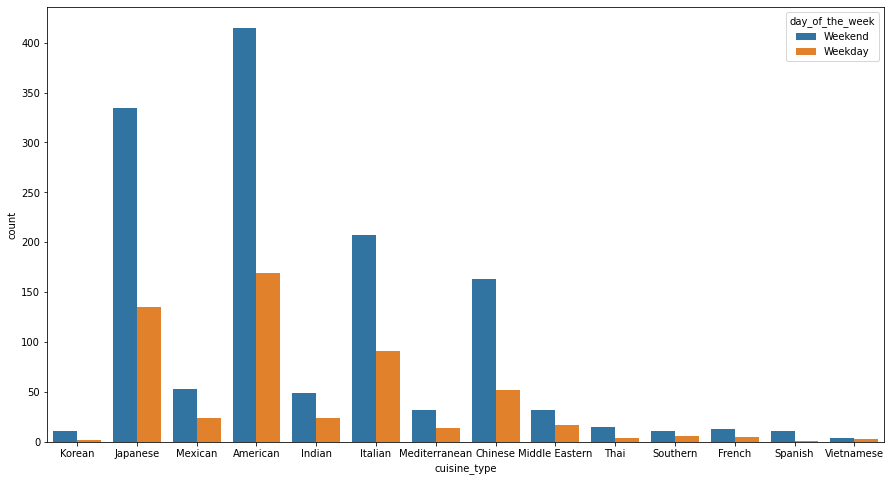

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x='cuisine_type', hue='day_of_the_week',data=df)
plt.show()

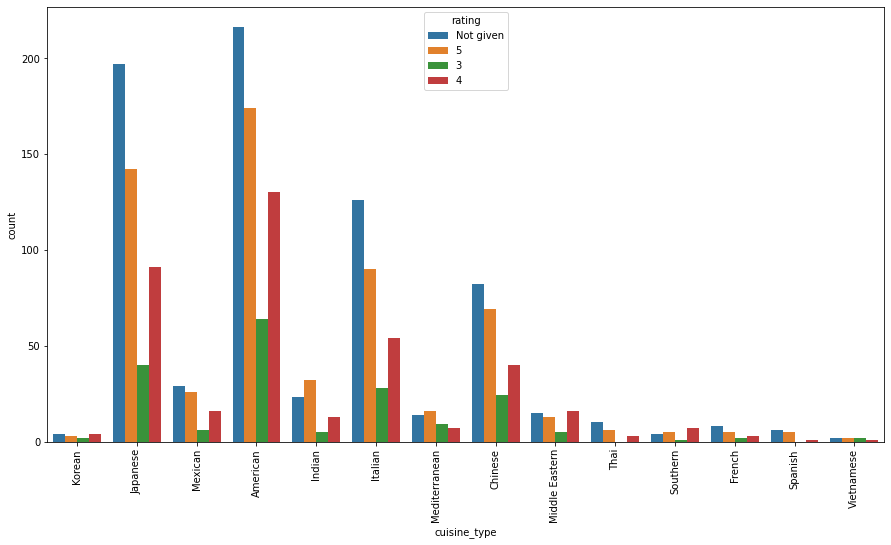

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x='cuisine_type', hue='rating',data=df)
plt.xticks(rotation=90)
plt.show()

###Observations:

*   Mediterranean and Indian food were the only restaurants where the number of 5 stars exceeded that of the rating 'Not given'
*   Not given rating seems to be consistent with the other high ratings



###Observations:

*   American, Japanese, and Italian are the most popular cusine types on both weekends and weekdays




###Day of the week vs Food preparation time

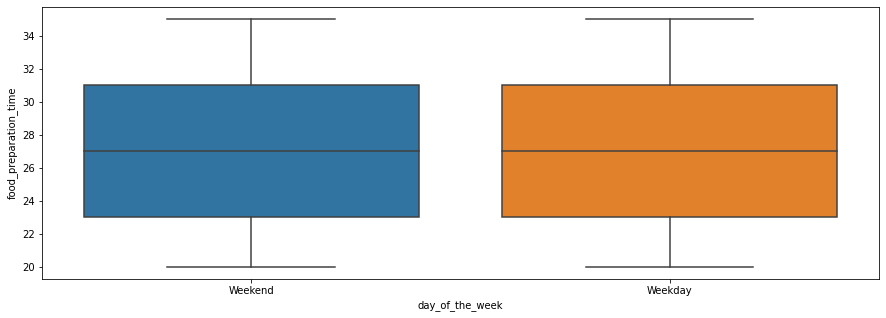

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x='day_of_the_week', y='food_preparation_time',data=df)
plt.show()

###Observations:

*   There is an evenly distributed distribution between day of the week and food preparation time



###Day of the week vs Delivery time

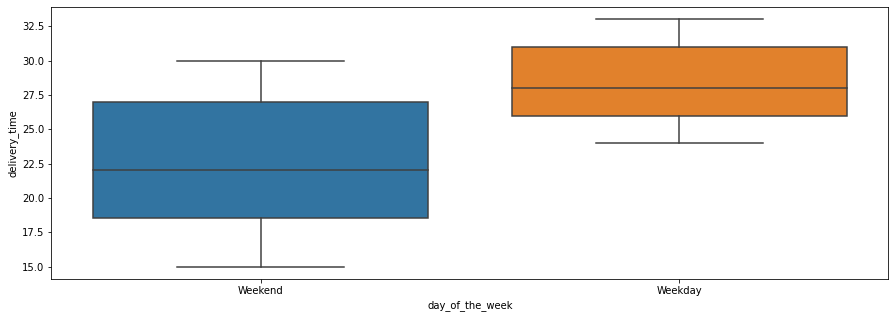

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x='day_of_the_week', y='delivery_time',data=df)
plt.show()

###Observations:

*   Orders are delivered quicker on weekends compared to weekdays
*  This needs to be further analyzed as there are more orders placed on weekends than weekdays, so it shouldn't take as long to deliver weekdays



###Cost of the order vs Day of the week

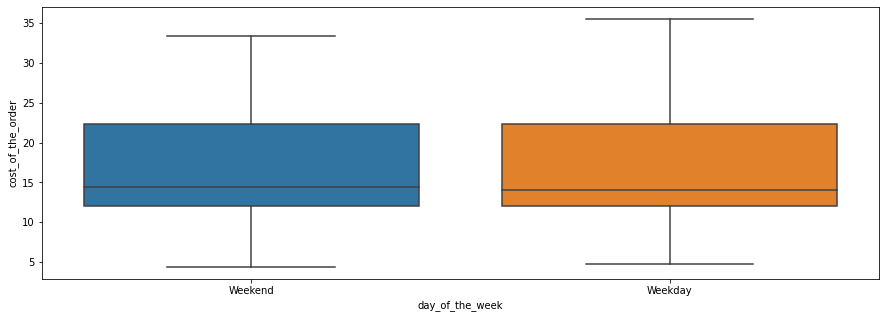

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x='day_of_the_week', y='cost_of_the_order',data=df)
plt.show()

###Observations

*   Cost of the order on weekends and weekday are the same
*   With low volume of orders on weekdays and high volume of orders on weekends, the business may want to consider ideas to bring in more orders on weekdays through advertising or offering some kind of discounts



###Delivery Time vs Food preparation time

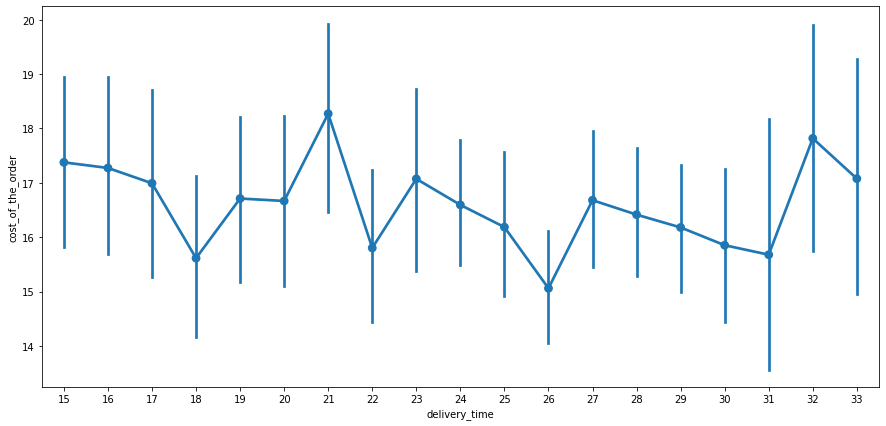

In [ ]:
plt.figure(figsize=(15,7))
sns.pointplot(x='delivery_time',y='cost_of_the_order',data=df)
plt.show()


###Observations:

*   The 95% confidence intervals seem to be consistent throughout the data 
*   A higher order cost does not seem to influence delivery time




###Food preparation time vs Rating

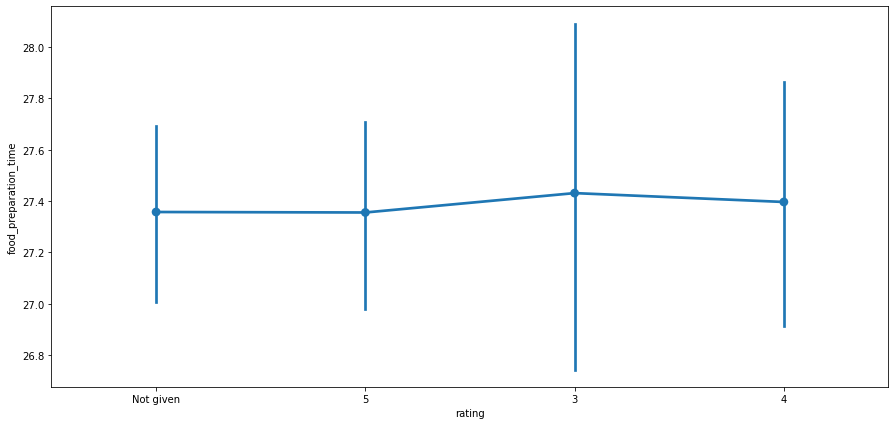

In [ ]:
plt.figure(figsize=(15,7))
sns.pointplot(x='rating',y='food_preparation_time',data=df)
plt.show()

###Observations:

*   When orders are prepared to quickly or take too long, a 3 star rating is more likely to be given by a customer
*   This makes sense as the food might not be cooked enough when prepared to quickly and if it takes to long it may be overcooked
*  No rating seems to correlate with a high rating
*  Find a way to get customers to rate




###Cost of the order vs Rating

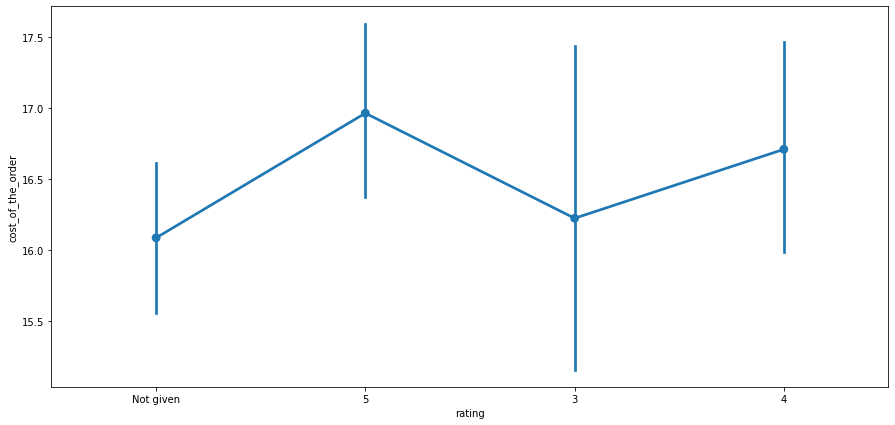

In [ ]:
plt.figure(figsize=(15,7))
sns.pointplot(x='rating',y='cost_of_the_order',data=df)
plt.show()

###Observations:

*   No rating is given the majority of the time when the cost of the order falls between 15.5 and 16.5
*   4 and 5 star ratings seem to be given when cost of the order is between 16 to 17.5 dollars
*  3 star rating is given as low as 15 dollars and as high as 17.5 dollars




###Delivery time vs Rating

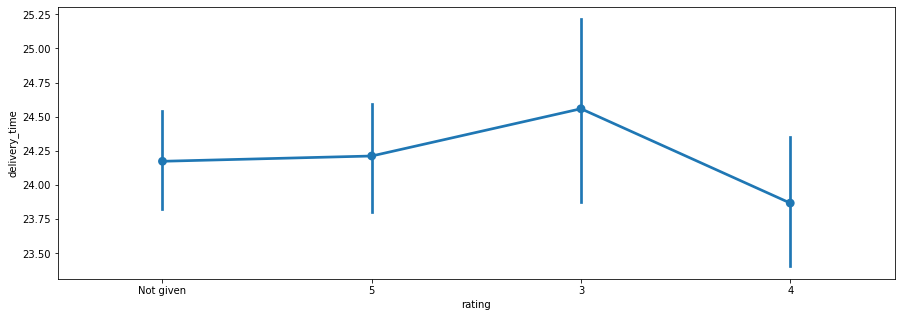

In [ ]:
plt.figure(figsize=(15,5))
sns.pointplot(x='rating', y='delivery_time', data=df)
plt.show()

###Observations:

*   There does seem to be a correlation with delivery time and rating, more so than food prep time and rating
*  The longer the delivery time the more likely a lower rating is given
*  Like food preparation time, orders that were not rated tend to correlate with higher ratings




###Heatmap showing relation among variables

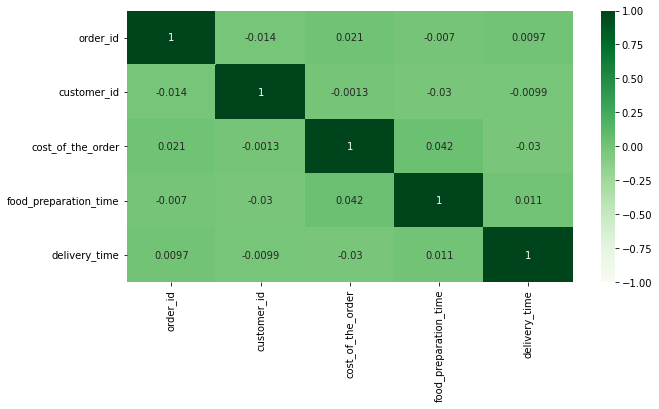

In [ ]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), cmap="Greens", annot=True,vmin=-1,vmax=1)
plt.show()

###Observations:

*   The correlation between the variables is not very strong
*   Food preparation time and cost of the order show the most correlation among the variables



### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
#Filtering rated restaurants only
df_rated_restaurants = df[df['rating'] != 'Not given'].copy()

#Change the rating column from object datatype to an int64
df_rated_restaurants['rating'] = df_rated_restaurants['rating'].astype('int')

#Creating dataframe with restaurants and their rating counts 
df_rating_count = df_rated_restaurants.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [ ]:
#restaurant names with rating count more than 50 
restaurant_names = df_rating_count[df_rating_count['rating']>50]['restaurant_name']

#Filtering restaurants with rating more than 50
df_4 = df_rated_restaurants[df_rated_restaurants['restaurant_name'].isin(restaurant_names)].copy()

#Mean rating of restaurants greater than 4
df_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending=False).reset_index().dropna()

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations:

*   Meatball Shack had the highest rating average at 4.5
*   The restaurant's with the most orders were also among the top restaurants based off of average rating
*  If the business can come up with a way to get more people to rate their order, it would give a clearer representation of restaurant's star rating851 




### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
#Determining revenue 
def compute_rev(x):
  if x > 20:
      return x*0.25
  elif x > 5:
      return x*0.15
  else:
      return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [ ]:
#Now to find and print total rev
total_rev=df['Revenue'].sum()
print(total_rev)

6166.303


#### Observations:

*   The business generated $6,163.39 in revenue 




### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
#New column for total time 
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
#Number of orders greater than 60 minutes of delivery time
df_greater_than_60 = df[df['total_time'] > 60]
#Finding the percentage of orders over 60 minutess
percentage = (df_greater_than_60.shape[0] / df.shape[0]) * 100

#Printing percentage and total number of orders over 60 minutes
print('The percentage of orders that have a delivery time of over 60 minutes is: ', (percentage))
print('The number of orders that have a delivery time of over 60 minutes is: ', (df_greater_than_60.shape[0]), 'orders')

The percentage of orders that have a delivery time of over 60 minutes is:  10.537407797681771
The number of orders that have a delivery time of over 60 minutes is:  200 orders


#### Observations:

*   The number of orders with more than 60 minutes of delivery time is 200
*   The percentage of orders that have a delivery time of more than 60 minutes is 10.54%




### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Finding the mean delivery time on weekays
weekdays_delivery_time = df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
print("The mean delivery time on weekdays is: ", round(weekdays_delivery_time), 'minutes')

#Finding the mean delivery time on weekends
weekend_delivery_time = df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()
print("The mean delivery time for weekends is: ", round(weekend_delivery_time), 'minutes')

The mean delivery time on weekdays is:  28 minutes
The mean delivery time for weekends is:  22 minutes


#### Observations:

*   Weekday delivery time is higher than weekends, even with having significantly less orders compared to weekend
*   Further analysis is needed to see what factors drive delivery time.  Some possible causes worth further analysis could be distance to restaurants and traffic during weekdays and weekends as well as number of drivers present during the weekdays and weekends




### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

*   The number of orders is significantly greater on weekends than weekdays, which is somewhat surprising as there are 3 more days on weekdays than weekends.  
*   The most popular cuisines on weekends are also the most popular on weekdays.  American cuisine is the most popular on both weekends and weekdays.  Japanese and Italian are the next most popular.
*   Delivery time on weekdays is longer than on weekends.  This may be due to traffic, distance to restaurants, or number of drivers available.  Either way, this needs to be explored further.
*  If more ratings are given by customers, the data may be significantly affected and lead to more accurate conclusions.

### Recommendations:

*   The company needs to find a way to convince more customers to rate there experience when ordering.  This could lead to better and more accurate data.  It may also provide stronger correlations among the variables.  Possibly offering some kind of discount or reward may influence more customers to provide a rating.
*   More research needs to be conducted on the variable delivery time.  The question that needs to be answered is why is delivery time higher on weekdays compared to weekends.
*   The company should also consider some ways that would bring in more order volume on the weekdays.  One idea may be to come up with some marketing plan with some of the restaurants that are highly rated but do not bring in much order volume, such as, Indian and Mediterranean cuisines/restaurants.  These were the only 2 restaurants who had more 5 star ratings than the rating 'Not given'.



---

In [2]:
%%shell
jupyter nbconvert --to html /content/WalterEfirdProject1__FullCode.ipynb

[NbConvertApp] Converting notebook /content/WalterEfirdProject1__FullCode.ipynb to html
[NbConvertApp] Writing 771797 bytes to /content/WalterEfirdProject1__FullCode.html
